## EDA란?

**EDA(Exploratory Data Analysis)** 는 우리말로는 탐색적 데이터 분석이라고 할 수 있겠다.

주어진 데이터를 다양한 관점에서 살펴보고 탐색하면서 인사이트를 도출하는 것

* 각 row는 무엇을 의미하는가?
* 각 column은 무엇을 의미하는가?
* 각 column은 어떤 분포를 보이는가?
* 두 column은 어떤 연관성이 있는가?
등등등....

데이터를 받아들었을 때 해당데이터가 가진 기본적이 데이터 탐색을 할 수 있어야하며
데이터를 창의적으로 분석하면서 새로운 의미를 도출할 수 있어야 한다.

## 기본 정보 파악하기

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/young_survey.csv')
df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [3]:
basic_info = df.iloc[:, 140:]
basic_info

,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,20.0,176.0,67.0,2.0,female,right,high school
3,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,20.0,170.0,59.0,1.0,female,right,high school
...,...,...,...,...,...,...,...
992,20.0,164.0,57.0,1.0,female,right,high school
993,27.0,183.0,80.0,5.0,male,left,master's degree
994,18.0,173.0,75.0,0.0,female,right,high school
995,25.0,173.0,58.0,1.0,female,right,bachelor's degree


In [5]:
basic_info.describe()

,Age,Height,Weight,Number of siblings
count,997.000000,982.000000,981.000000,995.000000
mean,20.439318,173.610998,66.407747,1.300503
std,2.835443,9.373842,13.862403,1.015548
min,15.000000,148.000000,41.000000,0.000000
25%,19.000000,167.000000,55.000000,1.000000
50%,20.000000,173.000000,64.000000,1.000000
75%,22.000000,180.000000,75.000000,2.000000
max,30.000000,203.000000,165.000000,10.000000


성별과 같은 비정형 데이터는 ``describe()`` 로 정리되지 않는다.

In [6]:
basic_info['Gender'].value_counts()

female    587
male      405
Name: Gender, dtype: int64

In [7]:
basic_info['Education'].value_counts()

high school          618
bachelor's degree    207
master's degree       78
middle school         78
elementary school     10
doctorate degree       5
Name: Education, dtype: int64

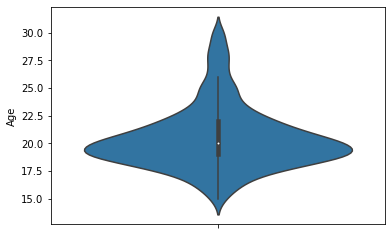

In [10]:
sns.violinplot(data = basic_info, y = 'Age')

위 분석결과에 따라 본 조사데이터는 주로 10대 후반에서 20대 까지를 주로 설명하는 데이터임을 확인할 수 있다.

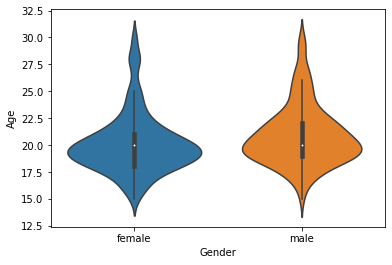

In [11]:
sns.violinplot(data = basic_info, x= 'Gender', y = 'Age')

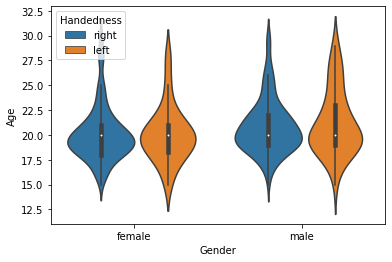

In [12]:
sns.violinplot(data = basic_info, x= 'Gender', y = 'Age', hue = 'Handedness')

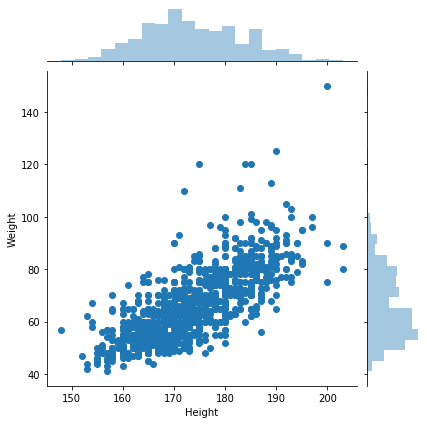

In [13]:
sns.jointplot(data = basic_info, x= 'Height', y= 'Weight' )

## 요즘 인기 직업은?

In [35]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/occupations.csv')
df.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


여성이 가장 많이 종사하고 있는 직종 찾기

In [25]:
women = df[df['gender'] == 'F']

In [26]:
women['occupation'].value_counts().sort_values(ascending = False)

student          60
other            36
administrator    36
librarian        29
educator         26
writer           19
artist           13
healthcare       11
marketing        10
programmer        6
homemaker         6
none              4
executive         3
salesman          3
scientist         3
entertainment     2
lawyer            2
engineer          2
technician        1
retired           1
Name: occupation, dtype: int64

다음은 남성들이 가장 많이 종사하고 있는 직종 상위

In [27]:
men = df[df['gender'] == 'M']

In [30]:
men['occupation'].value_counts().sort_values(ascending = False)

student          136
other             69
educator          69
engineer          65
programmer        60
administrator     43
executive         29
scientist         28
technician        26
writer            26
librarian         22
marketing         16
entertainment     16
artist            15
retired           13
lawyer            10
salesman           9
doctor             7
healthcare         5
none               5
homemaker          1
Name: occupation, dtype: int64

## 상관 관계 분석 (Correlation Analysis)

In [37]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/young_survey.csv')

music = df.iloc[:, :19]  # 18번 컬럼까지가 음악이었다.
music.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0


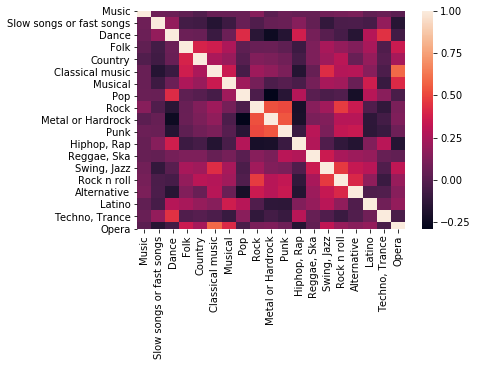

In [43]:
sns.heatmap(music.corr())

In [55]:
list(df.columns)

['Music',
 'Slow songs or fast songs',
 'Dance',
 'Folk',
 'Country',
 'Classical music',
 'Musical',
 'Pop',
 'Rock',
 'Metal or Hardrock',
 'Punk',
 'Hiphop, Rap',
 'Reggae, Ska',
 'Swing, Jazz',
 'Rock n roll',
 'Alternative',
 'Latino',
 'Techno, Trance',
 'Opera',
 'Movies',
 'Horror',
 'Thriller',
 'Comedy',
 'Romantic',
 'Sci-fi',
 'War',
 'Fantasy/Fairy tales',
 'Animated',
 'Documentary',
 'Western',
 'Action',
 'History',
 'Psychology',
 'Politics',
 'Mathematics',
 'Physics',
 'Internet',
 'PC',
 'Economy Management',
 'Biology',
 'Chemistry',
 'Reading',
 'Geography',
 'Foreign languages',
 'Medicine',
 'Law',
 'Cars',
 'Art exhibitions',
 'Religion',
 'Countryside, outdoors',
 'Dancing',
 'Musical instruments',
 'Writing',
 'Passive sport',
 'Active sport',
 'Gardening',
 'Celebrities',
 'Shopping',
 'Science and technology',
 'Theatre',
 'Fun with friends',
 'Adrenaline sports',
 'Pets',
 'Flying',
 'Storm',
 'Darkness',
 'Heights',
 'Spiders',
 'Snakes',
 'Rats',
 'Agein

In [44]:
df.corr()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.075426,0.066719,0.027648,-0.014272,0.055648,0.056730,0.059967,0.149958,0.016043,...,0.093707,0.016673,0.043828,0.091142,0.014790,0.073037,-0.078058,-0.068002,-0.128233,-0.011585
Slow songs or fast songs,0.075426,1.000000,0.188217,-0.062023,-0.072138,-0.159021,-0.078479,0.054375,-0.018347,0.050913,...,0.064778,0.002680,0.106225,0.024667,0.036608,-0.027398,0.010998,0.106873,0.125870,0.002352
Dance,0.066719,0.188217,1.000000,0.065863,0.055106,-0.093125,0.067430,0.424794,-0.147867,-0.241477,...,0.189977,0.053353,0.078635,0.184652,0.078517,0.026210,0.031215,-0.012681,0.014024,0.003952
Folk,0.027648,-0.062023,0.065863,1.000000,0.391850,0.366988,0.263987,0.023641,0.056471,0.062454,...,-0.069797,-0.129808,-0.099580,-0.121036,-0.155832,-0.013442,0.132414,-0.076549,-0.013412,0.089963
Country,-0.014272,-0.072138,0.055106,0.391850,1.000000,0.257474,0.202831,0.000716,0.129917,0.115289,...,-0.071510,-0.057090,-0.065920,-0.095447,0.000729,0.007146,0.074586,0.024685,0.073452,0.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spending on healthy eating,0.073037,-0.027398,0.026210,-0.013442,0.007146,0.077416,0.064933,-0.025233,0.030247,-0.005333,...,0.106373,0.178066,0.148477,0.237851,0.243666,1.000000,0.015248,0.019720,0.029572,-0.082342
Age,-0.078058,0.010998,0.031215,0.132414,0.074586,0.035176,0.014553,0.020440,-0.000670,0.004109,...,-0.133800,-0.066627,-0.032284,-0.073129,-0.012082,0.015248,1.000000,0.122711,0.238893,0.089174
Height,-0.068002,0.106873,-0.012681,-0.076549,0.024685,-0.005057,-0.240144,-0.133551,-0.024931,0.116562,...,-0.136491,0.146116,0.165349,-0.089903,0.235986,0.019720,0.122711,1.000000,0.735923,-0.005442
Weight,-0.128233,0.125870,0.014024,-0.013412,0.073452,0.010132,-0.152645,-0.093742,0.007529,0.168364,...,-0.151023,0.101246,0.141377,-0.085356,0.244790,0.029572,0.238893,0.735923,1.000000,-0.026374


In [46]:
df.corr()['Age'].sort_values(ascending = False)

Age                        1.000000
Weight                     0.238893
Elections                  0.212319
Prioritising workload      0.156256
Reliability                0.148141
                             ...   
Mood swings               -0.111890
Getting up                -0.119888
Questionnaires or polls   -0.128187
Shopping centres          -0.133800
Changing the past         -0.146895
Name: Age, Length: 139, dtype: float64

In [63]:
df.corr()['Getting up']

Music                         0.090009
Slow songs or fast songs     -0.052613
Dance                         0.027249
Folk                         -0.049612
Country                      -0.025315
                                ...   
Spending on healthy eating   -0.084574
Age                          -0.119888
Height                       -0.031602
Weight                       -0.054865
Number of siblings           -0.057354
Name: Getting up, Length: 139, dtype: float64

In [65]:
brunch_df = df.corr()['Getting up']

Music                         0.090009
Slow songs or fast songs     -0.052613
Dance                         0.027249
Folk                         -0.049612
Country                      -0.025315
                                ...   
Spending on healthy eating   -0.084574
Age                          -0.119888
Height                       -0.031602
Weight                       -0.054865
Number of siblings           -0.057354
Name: Getting up, Length: 139, dtype: float64

In [66]:
#그리고 brunch_df의 첫번째부터 19번째 인덱스(music에 해당하는)만 따로 뽑기
brunch_df[1:19]

Slow songs or fast songs   -0.052613
Dance                       0.027249
Folk                       -0.049612
Country                    -0.025315
Classical music             0.014285
Musical                     0.011869
Pop                         0.079101
Rock                        0.105245
Metal or Hardrock          -0.026769
Punk                       -0.029189
Hiphop, Rap                 0.038980
Reggae, Ska                -0.008434
Swing, Jazz                 0.019556
Rock n roll                 0.028889
Alternative                 0.027540
Latino                     -0.015060
Techno, Trance              0.019863
Opera                      -0.071819
Name: Getting up, dtype: float64

In [67]:
brunch_df[1:19].sort_values(ascending= False)

Rock                        0.105245
Pop                         0.079101
Hiphop, Rap                 0.038980
Rock n roll                 0.028889
Alternative                 0.027540
Dance                       0.027249
Techno, Trance              0.019863
Swing, Jazz                 0.019556
Classical music             0.014285
Musical                     0.011869
Reggae, Ska                -0.008434
Latino                     -0.015060
Country                    -0.025315
Metal or Hardrock          -0.026769
Punk                       -0.029189
Folk                       -0.049612
Slow songs or fast songs   -0.052613
Opera                      -0.071819
Name: Getting up, dtype: float64

In [69]:
thesis = ['Branded clothing', 'Healthy eating', 'Musical instruments', 'New environment', 'Prioritising workload', 'Spending on looks', 
          'Workaholism', 'Writing', 'Writing notes']
df[thesis].corr()

,Branded clothing,Healthy eating,Musical instruments,New environment,Prioritising workload,Spending on looks,Workaholism,Writing,Writing notes
Branded clothing,1.000000,0.086229,-0.081135,0.060765,0.010480,0.418399,-0.013694,-0.099731,-0.025140
Healthy eating,0.086229,1.000000,0.073319,0.059311,0.242131,0.130878,0.238644,0.008610,0.166951
Musical instruments,-0.081135,0.073319,1.000000,0.054590,0.075620,-0.040460,0.091071,0.343816,0.106172
New environment,0.060765,0.059311,0.054590,1.000000,-0.044485,0.073125,-0.007938,-0.029381,-0.079397
Prioritising workload,0.010480,0.242131,0.075620,-0.044485,1.000000,0.020372,0.416831,0.048875,0.368805
Spending on looks,0.418399,0.130878,-0.040460,0.073125,0.020372,1.000000,-0.040615,-0.002373,0.043540
Workaholism,-0.013694,0.238644,0.091071,-0.007938,0.416831,-0.040615,1.000000,0.109577,0.409415
Writing,-0.099731,0.008610,0.343816,-0.029381,0.048875,-0.002373,0.109577,1.000000,0.112684
Writing notes,-0.025140,0.166951,0.106172,-0.079397,0.368805,0.043540,0.409415,0.112684,1.000000


## 클러스터 분석

어떤 무리를 대상으로하는 분석

In [70]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/young_survey.csv')

In [71]:
interest = df.loc[:, 'History' :'Pets']
interest.head()

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,...,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0
1,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,...,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0
2,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,...,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0
3,4.0,4.0,5.0,4.0,1.0,3.0,1.0,2.0,3.0,3.0,...,1.0,1.0,1.0,2.0,4.0,3.0,1.0,2.0,1.0,1.0
4,3.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,...,3.0,1.0,4.0,3.0,3.0,3.0,2.0,4.0,2.0,1.0


In [76]:
corr = interest.corr()
corr

,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,...,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets
History,1.000000,0.281493,0.400845,0.008328,0.079638,0.022010,0.027346,0.054872,0.014807,0.014117,...,-0.013262,0.064929,0.033196,-0.087338,-0.061804,0.135597,0.185301,0.024960,0.061201,0.031920
Psychology,0.281493,1.000000,0.195338,0.043030,0.065774,0.000075,-0.077712,0.087072,0.202913,0.058541,...,-0.083949,0.006261,0.042099,-0.012857,0.058210,0.060809,0.268484,0.020027,0.058522,0.053322
Politics,0.400845,0.195338,1.000000,0.104033,0.130293,0.058863,0.088846,0.304575,-0.090532,-0.058849,...,0.042173,0.069026,-0.018266,-0.023371,-0.064327,0.186743,0.085306,0.009968,0.090355,-0.055446
Mathematics,0.008328,0.043030,0.104033,1.000000,0.595188,0.157779,0.295564,0.218796,0.078043,0.181953,...,0.055701,0.083826,0.031867,-0.111193,-0.156334,0.249863,-0.018890,-0.030492,0.098004,-0.031633
Physics,0.079638,0.065774,0.130293,0.595188,1.000000,0.103793,0.339429,0.010678,0.212261,0.322827,...,0.016199,0.118929,0.047723,-0.211790,-0.227379,0.430393,0.001382,-0.029794,0.146055,-0.022982
Internet,0.022010,0.000075,0.058863,0.157779,0.103793,1.000000,0.467867,0.164447,-0.101429,-0.107657,...,0.171394,0.009498,-0.049947,0.114478,0.086552,0.190400,-0.149085,0.108927,0.072552,0.006894
PC,0.027346,-0.077712,0.088846,0.295564,0.339429,0.467867,1.000000,0.155285,-0.083648,-0.042937,...,0.080169,0.127505,-0.005789,-0.050504,-0.162955,0.420528,-0.177682,0.004907,0.154008,-0.066745
Economy Management,0.054872,0.087072,0.304575,0.218796,0.010678,0.164447,0.155285,1.000000,-0.173794,-0.180850,...,0.049986,0.071795,-0.045067,0.090132,0.111786,0.060767,-0.009515,0.066244,0.126719,-0.061738
Biology,0.014807,0.202913,-0.090532,0.078043,0.212261,-0.101429,-0.083648,-0.173794,1.000000,0.689980,...,-0.011216,0.055579,0.268927,0.012611,0.090339,0.151654,0.168296,0.013397,0.039657,0.169852
Chemistry,0.014117,0.058541,-0.058849,0.181953,0.322827,-0.107657,-0.042937,-0.180850,0.689980,1.000000,...,-0.041194,0.042481,0.200144,-0.083627,0.002447,0.195571,0.098171,-0.024690,0.035784,0.106649


In [77]:
corr['History'].sort_values(ascending=False)

History                   1.000000
Politics                  0.400845
Geography                 0.327354
Law                       0.298363
Psychology                0.281493
Reading                   0.262948
Religion                  0.203840
Art exhibitions           0.200643
Theatre                   0.185301
Writing                   0.164617
Foreign languages         0.145471
Science and technology    0.135597
Musical instruments       0.107279
Countryside, outdoors     0.096609
Physics                   0.079638
Active sport              0.064929
Adrenaline sports         0.061201
Economy Management        0.054872
Cars                      0.050644
Medicine                  0.040023
Gardening                 0.033196
Dancing                   0.032925
Pets                      0.031920
PC                        0.027346
Fun with friends          0.024960
Internet                  0.022010
Biology                   0.014807
Chemistry                 0.014117
Mathematics         

이런식으로 각 관심사별로 정리하기에는 시간이 오래걸린다

쉬운방법을 소개 (아래에)

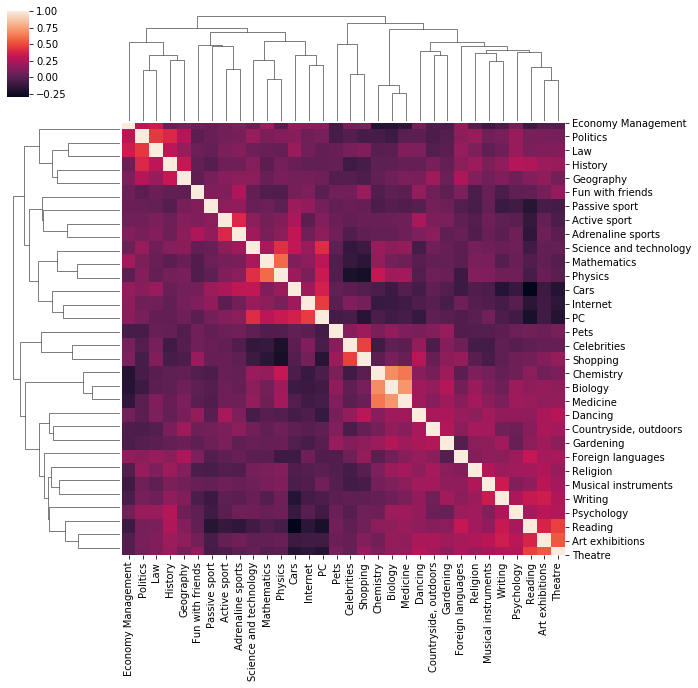

In [78]:
sns.clustermap(corr)

## 영화카페 운영하기

주어진 데이터셋에서 영화 장르에 대한 column은 **'Horror'** 부터 **'Action'** 까지이다.

영화 장르에 대해서 ``clustermap``을 그려보라

In [79]:
%matplotlib inline
import pandas as pd
import seaborn as sns

df = pd.read_csv('data/survey.csv')

df.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Handedness,Education
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right,bachelor's degree
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right,bachelor's degree
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right,high school
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,4.0,4,1.0,22.0,172.0,59.0,1.0,female,right,bachelor's degree
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,3.0,2,4.0,20.0,170.0,59.0,1.0,female,right,high school


In [81]:
genre = df.loc[:, 'Horror' : 'Action']
genre

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0
1,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0
2,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0
3,4.0,4.0,3.0,3.0,4.0,3.0,1.0,2.0,5.0,1.0,2.0
4,4.0,4.0,5.0,2.0,3.0,3.0,4.0,4.0,3.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
992,2.0,3.0,4.0,5.0,4.0,2.0,5.0,5.0,2.0,1.0,4.0
993,2.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,2.0,5.0
994,5.0,5.0,3.0,5.0,2.0,1.0,4.0,4.0,3.0,1.0,3.0
995,3.0,4.0,5.0,3.0,1.0,2.0,5.0,5.0,3.0,1.0,4.0


In [82]:
corr_ge = genre.corr()
corr_ge

,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action
Horror,1.000000,0.503069,0.098243,-0.128117,0.165834,0.136508,-0.087150,0.004865,-0.063749,0.078845,0.129958
Thriller,0.503069,1.000000,-0.008975,-0.164751,0.230838,0.220754,-0.090075,-0.025239,0.046558,0.124719,0.278214
Comedy,0.098243,-0.008975,1.000000,0.286236,0.040425,-0.077274,0.211025,0.180246,-0.007444,-0.033091,0.121256
Romantic,-0.128117,-0.164751,0.286236,1.000000,-0.097219,-0.193751,0.349432,0.239951,-0.083895,-0.126574,-0.181823
Sci-fi,0.165834,0.230838,0.040425,-0.097219,1.000000,0.274634,-0.009158,0.068642,0.141714,0.276898,0.363429
War,0.136508,0.220754,-0.077274,-0.193751,0.274634,1.000000,-0.072474,-0.026996,0.235355,0.396669,0.299257
Fantasy/Fairy tales,-0.087150,-0.090075,0.211025,0.349432,-0.009158,-0.072474,1.000000,0.679270,0.140227,-0.023267,-0.051591
Animated,0.004865,-0.025239,0.180246,0.239951,0.068642,-0.026996,0.679270,1.000000,0.148375,-0.003069,0.019379
Documentary,-0.063749,0.046558,-0.007444,-0.083895,0.141714,0.235355,0.140227,0.148375,1.000000,0.263859,0.131062
Western,0.078845,0.124719,-0.033091,-0.126574,0.276898,0.396669,-0.023267,-0.003069,0.263859,1.000000,0.320005


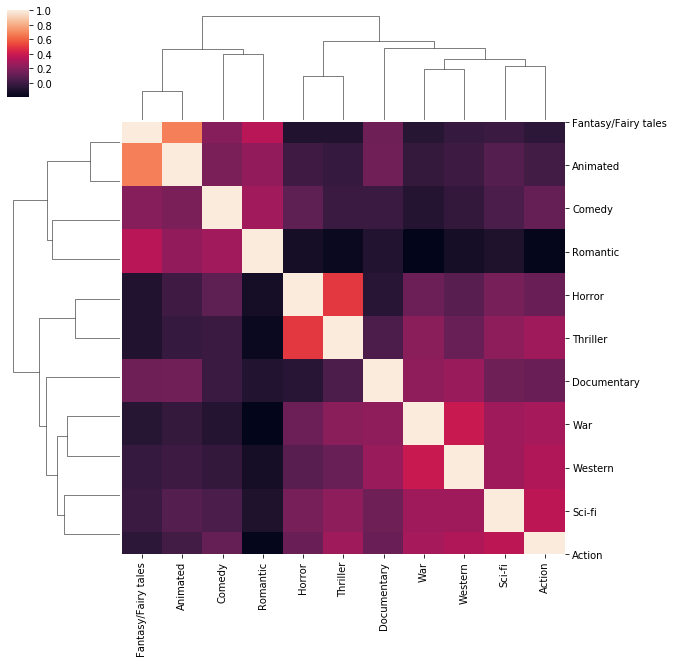

In [83]:
sns.clustermap(corr_ge)

## 타이타닉 EDA

당시 탑승자들의 정보가 담겨 있습니다. 생존 여부, 성별, 나이, 지불한 요금, 좌석 등급 등의 정보가 있는데요.

* 생존 여부는 'Survived' column에 저장되어 있습니다. 0이 사망, 1이 생존을 의미합니다.
* 좌석 등급은 'Pclass' column에 저장되어 있습니다. 1은 1등실, 2는 2등실, 3은 3등실을 의미합니다.
* 지불한 요금은 'Fare' column에 저장되어 있습니다.

In [132]:
%matplotlib inline
import pandas as pd
import seaborn as sns

titanic = pd.read_csv('data/titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


타이타닉 탑승승객 분포

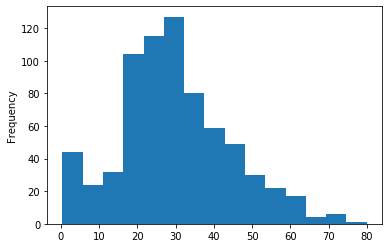

In [90]:
titanic['Age'].plot(kind = 'hist', bins = 15)

생존자와 사망자 수

In [93]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

가장 높은 요금을 낸 사람의 연령대

In [95]:
titanic['Fare'].sort_values(ascending=False)

679    512.3292
258    512.3292
737    512.3292
341    263.0000
438    263.0000
         ...   
277      0.0000
633      0.0000
302      0.0000
597      0.0000
271      0.0000
Name: Fare, Length: 891, dtype: float64

In [98]:
titanic.iloc[677: 680, :-3]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket
677,678,1,3,"Turja, Miss. Anna Sofia",female,18.0,0,0,4138
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755


가장 많은 사람이 탑승한 곳(객실 등급으로)

In [101]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

생존률이 높은 객실등급, 나이와 성별에 따른 생존율

In [135]:
female = titanic['Sex'] == 'female'

In [136]:
titanic['gender'] = 0
titanic.loc[female, 'gender'] = 1

In [139]:
cor_data = titanic.loc[:,['Survived', 'Pclass', 'Age', 'gender']]

In [140]:
cor_data.corr()

,Survived,Pclass,Age,gender
Survived,1.000000,-0.338481,-0.077221,0.543351
Pclass,-0.338481,1.000000,-0.369226,-0.131900
Age,-0.077221,-0.369226,1.000000,-0.093254
gender,0.543351,-0.131900,-0.093254,1.000000
